<div>
<img src="https://bsse.ethz.ch/_jcr_content/orgbox/image.imageformat.logo.1856503938.svg" width="200" align="right"/>
    <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQe1ZHapHvYNyrCLtdygLfLu92gN3ztZ64m9U8eNLeYE5BKY7r9wJiBgH7cnhZ7B269qw&usqp=CAU" width="250" align="left" style="display: inline;"/>
    <div ><h1 style="display: inline;"><br/>Introduction to Scientific Computing</h1></div>

 </div>

#**Introduction to Scientific Computing**
### *Biotechnology Master Computational Biology and Bioinformatics Master Advanced Course.*



**Dr. Roman Vetter**

*vetterro@ethz.ch*

Department of Biosystems Science and Engineering ETH Zürich
Spring semester 2023

#**Lecture 1:** Introduction +  Algorithmic complexity & floating-point arithmetic

**Algorithm**: A finite sequence of well-defined instructions to solve a particular problem.

**Example**: Given a list of number return the min and max values

In [ ]:
input_string = input('Enter elements of a list separated by space ')

# The split() method splits a string into a list.
user_list = input_string.split()  

# Print list
print('list: ', user_list)

# Convert each element to an int type
for i in range(len(user_list)):
    # Here we convert
    user_list[i] = int(user_list[i])

# Check if the user wrongly input an empty list
if len(user_list) == 0:
  print('The input list given by the user is not valid')

# Algorithm to find minimum value in a list
min = user_list[0]              # Minimum value is initialized as the first element of the list
for i in range(len(user_list)): # Loop over all the list element. N.B: In this formulation with len() function,
                                # Python will iterate from 0 to the lenght of the list - 1
  if user_list[i] < min:  
    min = user_list[i]

print('The minimum number of the list is:', min)

Enter elements of a list separated by space 1 2
list:  ['1', '2']
The minimum number of the list is: 1


**Finite Precision**:

Computers can rearrange formulas and solve equations symbolically. This is an example using Python SymPy library,

In [ ]:
from sympy import symbols, solve, pprint

# Define the equation
a, b, c, x = symbols('a b c x')
eq = a*x**2 + b*x + c

# Solve the equation
solution = solve(eq, x)

# Pretty-print the solution
pprint(solution)



⎡        _____________   ⎛       _____________⎞ ⎤
⎢       ╱           2    ⎜      ╱           2 ⎟ ⎥
⎢-b + ╲╱  -4⋅a⋅c + b    -⎝b + ╲╱  -4⋅a⋅c + b  ⎠ ⎥
⎢─────────────────────, ────────────────────────⎥
⎣         2⋅a                     2⋅a           ⎦


*Can all the numbers be stored in a computer? No*

This happens because computers use finite precision to represent numbers. In particular, floating-point numbers are represented using a fixed number of bits to represent the sign, exponent, and fraction components of the number. The number of bits used to represent each component depends on the floating-point format being used.

For example, the standard IEEE 754 format for 64-bit binary floating-point numbers uses 1 bit for the sign, 11 bits for the exponent, and 52 bits for the fraction. This allows the representation of numbers with up to 15-17 decimal digits of precision.

**Single and Double Precision**


In [ ]:
import numpy as np

# Define a single-precision float (32 bits)
single_precision = np.float32(1.123456789)

# Define a double-precision float (64 bits)
double_precision = np.float64(1.123456789)

# Print the values of the two floats
print("Single precision: ", single_precision)
print("Double precision: ", double_precision)

# Add 1 to each of the floats
single_precision += 1
double_precision += 1

# Print the values of the two floats after adding 1
print("Single precision after adding 1: ", single_precision)
print("Double precision after adding 1: ", double_precision)

Single precision:  1.1234568
Double precision:  1.123456789
Single precision after adding 1:  2.123456835746765
Double precision after adding 1:  2.123456789


As we can see, the single precision float has lost precision after adding 1, while the double precision float has maintained its precision. This is because single precision floats have a smaller range of representable values and a lower precision (i.e., fewer significant digits) than double precision floats.

In [ ]:
epsilon = 1

while 1 + epsilon > 1:
    epsilon /= 2

print("Machine epsilon is approximately:", epsilon)


Machine epsilon is approximately: 1.1102230246251565e-16


In this code, we start by setting eps to 1.0. We then enter a loop where we repeatedly divide eps by 2 until adding eps to 1.0 no longer changes the result. This is because in floating-point arithmetic, numbers are represented with a fixed number of bits, which means that there is a limit to how small a number can be represented.


**Numerical Cancellation**: 

**Example**: Approximation of the derivative via the difference quotient

Choose a function:
1. sin(x)
2. x^2 - 3x + 2
3. e^x
1


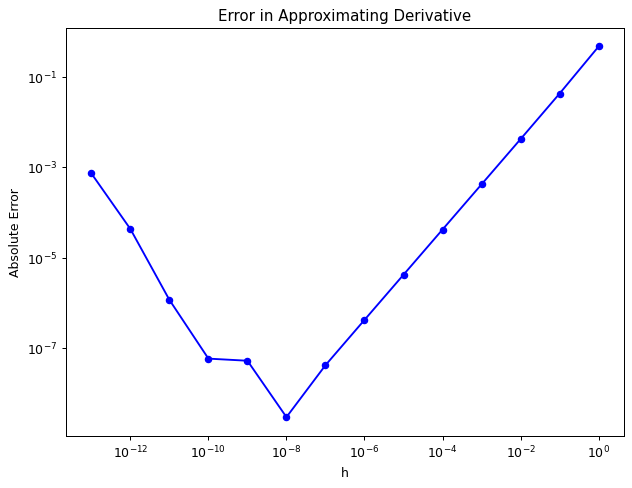

In [ ]:
import math
import matplotlib.pyplot as plt

def f1(x):
    return math.sin(x)

def f2(x):
    return x ** 2 - 3 * x + 2

def f3(x):
    return math.exp(x)

functions = {
    1: f1,
    2: f2,
    3: f3
}

print("Choose a function:")
print("1. sin(x)")
print("2. x^2 - 3x + 2")
print("3. e^x")

selected_function = int(input())

if selected_function not in functions:
    print("Invalid selection")
else:
    f = functions[selected_function]

    def dfdx(x, h):
        return (f(x + h) - f(x)) / h

    x = 1.0
    h_values = [1e0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13]

    exact_derivative = math.cos(x) if selected_function == 1 else 2 * x - 3 if selected_function == 2 else math.exp(x)

    errors = []
    for h in h_values:
        approx_derivative = dfdx(x, h)
        error = abs(approx_derivative - exact_derivative)
        errors.append(error)

    fig, ax = plt.subplots(figsize=(8, 6), dpi=90)
    ax.plot(h_values, errors, 'bo-', markersize=5)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('h')
    ax.set_ylabel('Absolute Error')
    ax.set_title('Error in Approximating Derivative')

    plt.show()


In [1]:
import math
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

def f1(x):
    return math.sin(x)

def f2(x):
    return x ** 2 - 3 * x + 2

def f3(x):
    return math.exp(x)

functions = {
    1: f1,
    2: f2,
    3: f3
}

def dfdx(f, x, h):
    return (f(x + h) - f(x)) / h

def update(selected_function, x):
    f = functions[selected_function]

    h_values = [1e0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13]

    exact_derivative = math.cos(x) if selected_function == 1 else 2 * x - 3 if selected_function == 2 else math.exp(x)

    errors = []
    for h in h_values:
        approx_derivative = dfdx(f, x, h)
        error = abs(approx_derivative - exact_derivative)
        errors.append(error)

    fig, ax = plt.subplots(figsize=(8, 6), dpi=90)
    line, = ax.plot(h_values, errors, 'bo-', markersize=5)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('h')
    ax.set_ylabel('Absolute Error')
    ax.set_title('Error in Approximating Derivative')
    plt.show()

dropdown = widgets.Dropdown(
    options=[('sin(x)', 1), ('x^2 - 3x + 2', 2), ('e^x', 3)],
    value=1,
    description='Function:'
)

slider = widgets.FloatSlider(
    value=1.0,
    min=-10.0,
    max=10.0,
    step=0.1,
    description='x:',
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

interactive_plot = widgets.interactive(update, selected_function=dropdown, x=slider)
display(interactive_plot)


interactive(children=(Dropdown(description='Function:', options=(('sin(x)', 1), ('x^2 - 3x + 2', 2), ('e^x', 3…

As we can see from the results, when h is too large (e.g., h = 0.01), the approximate derivative is not very accurate and has a significant absolute error. This is because the step size is too large to capture the local behavior of the function.

On the other hand, when h is too small (e.g., h = 1e-10 or h = 1e-12), we suffer from numerical cancellation and the approximate derivative becomes zero, leading to a large absolute error. In practice, it is often recommended to choose h based on the square root of the machine epsilon, which is a measure of the precision of the floating-point arithmetic used by the computer.